# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [22]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [23]:
df.shape

(30181, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [25]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

In [26]:
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])

print(df.head())

medals_gender = pd.crosstab(df['Medal'], df['Sex'])
print("\nКоличество медалей по полу:\n", medals_gender)

    ID                      Name Sex   Age  Height  Weight     Team  NOC  \
40  16  Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0  Finland  FIN   
41  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
42  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
44  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   
48  17   Paavo Johannes Aaltonen   M  28.0   175.0    64.0  Finland  FIN   

          Games  Year  Season    City       Sport  \
40  2014 Winter  2014  Winter   Sochi  Ice Hockey   
41  1948 Summer  1948  Summer  London  Gymnastics   
42  1948 Summer  1948  Summer  London  Gymnastics   
44  1948 Summer  1948  Summer  London  Gymnastics   
48  1948 Summer  1948  Summer  London  Gymnastics   

                                     Event   Medal  
40             Ice Hockey Men's Ice Hockey  Bronze  
41  Gymnastics Men's Individual All-Around  Bronze  
42        Gymnastics Men's Team All-Around    Gold  
44          

**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [27]:
gold_medals_by_country = df[df['Medal'] == 'Gold'].groupby('Team').size().sort_values(ascending=False)
top_country = gold_medals_by_country.idxmax()
print(f"\nСтрана с наибольшим количеством золотых медалей: {top_country} ({gold_medals_by_country.max()})")


Страна с наибольшим количеством золотых медалей: United States (2075)


**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

In [28]:
sport_sex_crosstab = pd.crosstab(df['Sport'], df['Sex'])
print("\nРаспределение пола по видам спорта:\n", sport_sex_crosstab.head(10))


Распределение пола по видам спорта:
 Sex                  F     M
Sport                       
Alpine Skiing      180   174
Archery            100   106
Art Competitions     0     2
Athletics         1239  2409
Badminton           73    81
Baseball             0   333
Basketball         390   610
Beach Volleyball    35    33
Biathlon           147   241
Bobsleigh           24   259


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

In [29]:
hockey_women = df[(df['Sport'] == 'Ice Hockey') & (df['Sex'] == 'F')]
mean_age = hockey_women['Age'].mean()
std_age = hockey_women['Age'].std()
print(f"\nСредний возраст женщин в хоккее: {mean_age:.2f}")
print(f"Стандартное отклонение возраста: {std_age:.2f}")


Средний возраст женщин в хоккее: 24.42
Стандартное отклонение возраста: 4.36


**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

In [30]:
bronze_women = df[(df['Medal'] == 'Bronze') & (df['Sex'] == 'F')]
bronze_women_by_country = bronze_women.groupby('Team').size().sort_values(ascending=False)
top_country_bronze_women = bronze_women_by_country.idxmax()
print(f"\nСтрана с наибольшим количеством женщин с бронзовыми медалями: {top_country_bronze_women} ({bronze_women_by_country.max()})")


Страна с наибольшим количеством женщин с бронзовыми медалями: United States (360)


**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

In [31]:
total_medals_by_country = df.groupby('Team').size().sort_values(ascending=False)
top3_countries = total_medals_by_country.head(3).index.tolist()

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

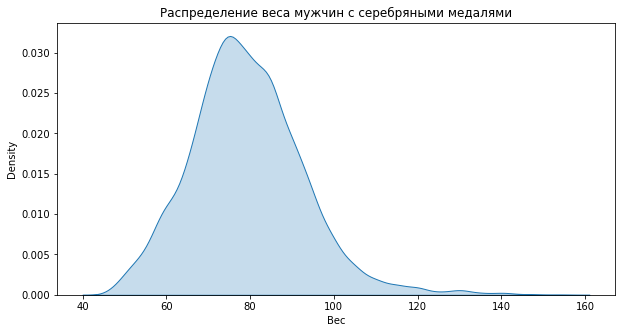

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

silver_men = df[(df['Medal'] == 'Silver') & (df['Sex'] == 'M')]
plt.figure(figsize=(10,5))
sns.kdeplot(silver_men['Weight'], shade=True)
plt.title("Распределение веса мужчин с серебряными медалями")
plt.xlabel("Вес")
plt.show()

**8. Постройте boxplot для возраста участника в зависимости от медали**

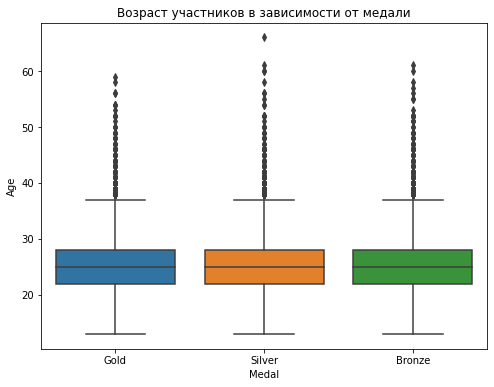

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Medal', y='Age', order=['Gold','Silver','Bronze'])
plt.title("Возраст участников в зависимости от медали")
plt.show()

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

C:\Users\hello\anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


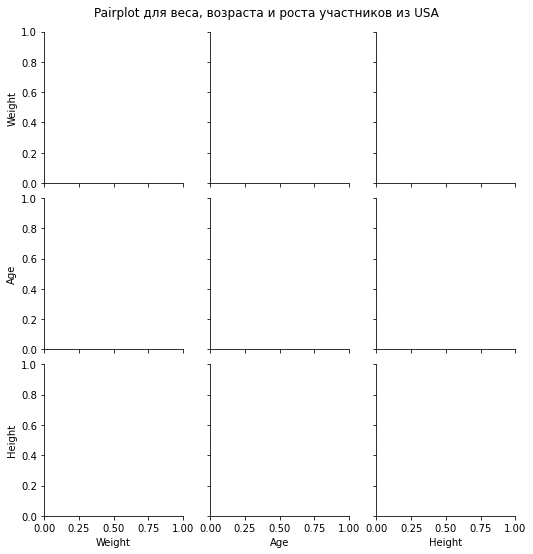

In [35]:
usa_athletes = df[df['Team'] == 'USA'][['Weight', 'Age', 'Height']]
sns.pairplot(usa_athletes)
plt.suptitle("Pairplot для веса, возраста и роста участников из USA", y=1.02)
plt.show()